In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import time
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
from static_grader import grader

# Quandl Miniproject


## Introduction


Data provider [Quandl](https://www.quandl.com/) offers a vast array of free and paid databases, all accessible with the same Python API (application program interface). Quandl aggregates data from many sources, ranging from scientific to economic to government related topics. They conveniently provide the data to you in powerful Pandas DataFrames.

**In this project, you will gain experience working with Python and Pandas using the data from Quandl.**

At the completion of this project, you will understand how to access all of the Quandl data and how to then wrangle that data in Pandas.


## Getting Data From Quandl


To use Quandl you will have to create an API key. The purpose of the API key is to make it easy for Quandl to track the usage of their data (creating data for them to study!) and for them to ensure that no one user is abusing their system with too many requests.

Create an API key by first creating an account on [Quandl](https://www.quandl.com/). You can log in with your Google, GitHub or LinkedIn accounts if you like.

After creating an account, access your *Account Settings* from the *Me* dropdown in the upper right corner. Then click on the *API KEY* link on the left below *PASSWORD*. Save the API Key: you'll need that in a moment.

There is [documentation](https://www.quandl.com/docs/api?python#) available for the API. You'll need to look through that to find a few pieces of information, but we will walk you through the basics right now.


### Test Query


Quandl provides a Python module that allows for easy access to their API.  Let's make sure we have the right version installed.  It should start with a 3.

In [3]:
import pandas as pd
import quandl
print quandl.version.VERSION

3.0.1


Now, tell Quandl about the API key you created above:

In [4]:
quandl.ApiConfig.api_key = 'tKE_SBXkpn6Aia_oNusi'  # Fill in your value here

Now we will access some Sunspot data. Visit Quandl's page for the [Solar Influences Data Analysis Center](https://www.quandl.com/data/SIDC/SUNSPOTS_D-Total-Sunspot-Numbers-Daily).

This is daily data collected by the Royal Observatory of Belgium starting in 1818. Observe in the upper right hand corner of the page you will find a *Quandl Code*. You will need this code to access this specific data set. Each data set has its own code, which you can use to download the data:

In [5]:
sunspots = quandl.get('SIDC/SUNSPOTS_D')

The string `SIDC/SUNSPOTS_D` is a code for retrieving specific data offered by Quandl. `SIDC` refers to the Royal Observatory database, and `SUNSPOTS_D` is a specific data set in that database.

Let's take a look at the data.

In [6]:
sunspots.head()

,Daily Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional Indicator
Date,,,,
1818-01-08 00:00:00,65.0,10.2,1.0,1.0
1818-01-13 00:00:00,37.0,7.7,1.0,1.0
1818-01-17 00:00:00,77.0,11.1,1.0,1.0
1818-01-18 00:00:00,98.0,12.6,1.0,1.0
1818-01-19 00:00:00,105.0,13.0,1.0,1.0


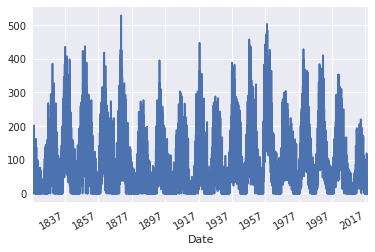

In [7]:
sunspots['Daily Sunspot Number'].plot()

That's how easy Quandl is! Find the Quandl code for the data you want and then call the `get` method.

# Questions


At the end of each of the following sections is a function that returns a list of data.  Currently, they return placeholder data.  You should alter these functions to return the correct data.  These functions are passed to the `score()` function that will submit the data to the grader and print out your grade.


## Question 1: Daily change

We want to find the daily percentage change in the closing price for the first 100 trading days of 2016 for Tableau Software (ticker symbol DATA).  This should be returned as a list of 100 tuples of (date, percentage).
- Format the dates as strings like "7/04/16" for July 4th or "11/01/16" for November 1st.
  - **IMPORTANT**: look closely at the date format. The day has a leading zero but the month does not. The year is represented with two digits. Admittedly this is not a standard way of representing dates. The goal is to get you to think carefully about date formatting [directives](http://strftime.org/).
- The returns will be percentages, not fractions. Therefore, submit a return of one-and-a-half percent as 1.5, not 0.015.
Quandl provides stock prices in the "WIKI Stock Prices" database.  When interacting with a new API, you may need to search the documentation to learn what data is available and how to access it. The documentation on the [Python API](https://docs.quandl.com/docs/python-time-series) indicates that we can access data sets via their Quandl code.  The [documentation for this data set](https://www.quandl.com/databases/WIKIP/documentation/about) links to a compressed CSV containing all the possible Quandl codes. The code below will download the Quandl codes.

In [8]:
%%bash
wget https://www.quandl.com/api/v3/databases/WIKI/codes.zip #-O WIKI_codes.zip -nc
unzip -u WIKI_codes.zip



Archive:  WIKI_codes.zip


--2018-08-06 01:50:00--  https://www.quandl.com/api/v3/databases/WIKI/codes.zip
Resolving www.quandl.com (www.quandl.com)... 104.25.53.103, 104.25.54.103, 2400:cb00:2048:1::6819:3567, ...
Connecting to www.quandl.com (www.quandl.com)|104.25.53.103|:443... connected.
HTTP request sent, awaiting response... 429 Too Many Requests
2018-08-06 01:50:00 ERROR 429: Too Many Requests.

  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of WIKI_codes.zip or
        WIKI_codes.zip.zip, and cannot find WIKI_codes.zip.ZIP, period.


In [9]:
wiki_codes = pd.read_csv('WIKI-datasets-codes.csv', header=None,
                    names=('Code', 'Description'))
wiki_codes.head()


,Code,Description
0,WIKI/AAPL,"Apple Inc (AAPL) Prices, Dividends, Splits and..."
1,WIKI/ABC,"AmerisourceBergen Corp. (ABC) Prices, Dividend..."
2,WIKI/AA,"Alcoa Inc. (AA) Prices, Dividends, Splits and ..."
3,WIKI/ABBV,"AbbVie Inc. (ABBV) Prices, Dividends, Splits a..."
4,WIKI/ACE,"ACE Ltd (ACE) Prices, Dividends, Splits and Tr..."


Find the Quandl code in `wiki_codes` for Tableau Software. Use this Quandl code with `quandl.get()`, using the `start_date='2015-12-31'` keyword argument to get only the data since 2016.

In [10]:
prices = quandl.get("WIKI/DATA",start_date='2015-12-31')

The DataFrame you get should have several hundred rows and 12 columns, with a `datetime` index.

In [11]:
assert prices.shape[1] == 12
print type(prices.index)
prices.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-12-31,94.47,95.690,93.9100,94.22,478491.0,0.0,1.0,94.47,95.690,93.9100,94.22,478491.0
2016-01-04,92.71,93.903,91.5100,93.79,670113.0,0.0,1.0,92.71,93.903,91.5100,93.79,670113.0
2016-01-05,94.22,94.630,93.2901,94.30,518028.0,0.0,1.0,94.22,94.630,93.2901,94.30,518028.0
2016-01-06,92.86,94.720,92.0100,93.50,853171.0,0.0,1.0,92.86,94.720,92.0100,93.50,853171.0
2016-01-07,91.28,93.140,88.0000,88.57,1249746.0,0.0,1.0,91.28,93.140,88.0000,88.57,1249746.0


The only column we need is the "Adj. Close" column, which is adjusted for corporate actions like dividends and splits.  Use the `.pct_change()` method on this column to get the daily fractional change and then adjust it to be a percentage. 

In [12]:
close_change = prices['Adj. Close'].pct_change()
close_change.head()

Date
2015-12-31         NaN
2016-01-04   -0.004564
2016-01-05    0.005438
2016-01-06   -0.008484
2016-01-07   -0.052727
Name: Adj. Close, dtype: float64

The dates are the index of the dataframe.  They can be made into a column with the `.reset_index()` method, or accessed directly with via the `.index` property of the dataframe or `close_change` series.  Once you have the dates, use the `.strftime()` method to format them as strings, with [these directives](http://strftime.org/).

In [13]:
date_str = close_change.index.strftime("%-m/%d/%y")


Finally, combine these two results into a list of tuples.  There are several approaches to this, including:
1. Make the two series into columns in the same dataframe.  Use a list comprehension over the [`.itertuples()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples) generator to produce a list of tuples.
2. Use [`zip()`](https://docs.python.org/2/library/functions.html#zip) to join the two series into a list of tuples.

In [14]:
wiki_data_tuples = zip(date_str, close_change)

print wiki_data_tuples[0]
print len(wiki_data_tuples)

(u'12/31/15', nan)
562


There are two problems with this:
1. The first element is a `NaN` from the last day of 2015.
2. There are more than 100 tuples.

Select the first 100 days of 2016, and submit those to the grader.

In [15]:
wiki_data_tuples_all = zip(date_str, 100*close_change)
wiki_data_tuples = wiki_data_tuples_all[1:101]

def wiki_data():
    return wiki_data_tuples

grader.score('quandl__wiki_data', wiki_data)

Your score:  1.0


## Question 2: State/industry pairs

The rest of the questions will use data provided by the US [Bureau of Labor Statistics](https://www.quandl.com/data/BLSE?keyword=). Among other things, they track monthly employment numbers by industry for each state.

We are specifically interested in their *State and Area Employment, Hours, and Earnings* data, as described in their [documentation](https://www.quandl.com/data/BLSE/documentation/documentation). The documentation describes the *Code Nomenclature* for data files for all of the combinations of states and industries and seasonally/not seasonally adjusted data.

Each of these data sets looks like this one:

https://www.quandl.com/data/BLSE/SMS01000004300000001-All-Employees-In-Thousands-Transportation-and-Utilities-Alabama

For these questions you will need to combine all of the data tables in this subgroup of the `BLS` database. There will be about 1118 tables in total. We will develop a process for downloading them one by one using `quandl.get()` on the Quandl codes for individual tables, and then concatenate them all into one data set.

Quandl provides a convenient database metadata file containing the `BLSE` data set codes and descriptions. We'll download this file and pick out the *State and Area Employment, Hours, and Earnings* data table codes based on the table descriptions.

In [267]:
%%bash
wget https://www.quandl.com/api/v3/databases/BLSE/codes.zip -O BLSE_codes.zip -nc
unzip -u BLSE_codes.zip

Archive:  BLSE_codes.zip


File `BLSE_codes.zip' already there; not retrieving.
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of BLSE_codes.zip or
        BLSE_codes.zip.zip, and cannot find BLSE_codes.zip.ZIP, period.


Now, we can load all of the metadata into a dataframe:

In [268]:
blse_codes = pd.read_csv('BLSE-datasets-codes.csv', header=None,
                    names=('Code', 'Description'))
blse_codes.head()

,Code,Description
0,BLSE/SMU24000005051700001,"All Employees, In Thousands; Telecommunication..."
1,BLSE/SMU51000000700000001,"All Employees, In Thousands; Service-Providing..."
2,BLSE/BDU0000000000000000110004RQ5,Employment; Gross Job Losses; All industries; ...
3,BLSE/BDU0000000000000000110005RQ5,Employment; Contractions; All industries; Rate...
4,BLSE/CEU0000000001,"Employment - All employees, thousands; Total n..."


All of the tables with relevant employment information have a description that begins, "All Employees".  Create a new data frame that contains only those rows.  There should be 1118 in total.

In [269]:
valid_rows = blse_codes['Description'].str.contains('All Employees')
valid_codes = blse_codes[valid_rows]

In [270]:
assert valid_codes.shape[0] == 1118

We want to download and store the tables corresponding with each Quandl code in the `valid_codes` DataFrame.  Let's start by downloading the data from the beginning of 2006 to the end of 2015 corresponding with just one code:

In [271]:
code = valid_codes.loc[0,'Code']
description = valid_codes.loc[0,'Description']

df = quandl.get(code, start_date = '2006-1-1', end_date = '2015-12-31')
code

'BLSE/SMU24000005051700001'

This table contains employment numbers for a particular industry, state, etc. We will be concatenating this table with tables for other industries, states, etc. Therefore we should add columns to our dataframe to keep track of which the state, category (industry), and a flag for whether the data are adjusted.  If `df` is a dataframe, a constant column can be added with
```python
df['State'] = pd.Series('West Virginia', index=df.index)
```
We can't hard-code the values for each data set, so we will have to work out the values either by parsing the text in `description`, or from the data set's code, as [described in the documentation](https://www.quandl.com/data/BLSE-BLS-Employment-Unemployment/documentation/documentation).

In [272]:
state = 'Maryland'
category = 'Telecommunications'
adjusted = 'In Thousands'

df['State'] = pd.Series(state, index=df.index)
df['Category'] = pd.Series(category, index=df.index)
df['Adjusted'] = pd.Series(adjusted, index=df.index)

Now, package this process into a single function, so that we can reuse it for each `BLSE` data set.  The function should accept a Quandl code and table description, and use those arguments to retrieve the data set into a dataframe, adding columns for the state, category, and adjustment flag.

It's also a good idea to have this function write the dataframe to a file.  This way, if a data retrieval fails, you can rerun just that data set.  If you need to restart the notebook, you won't need to download all of the data again.

You can use Pandas' `to_pickle()` and `from_pickle()` functions, or another mechanism.  The checkpoint library [ediblepickle](https://pypi.python.org/pypi/ediblepickle/1.1.3) could also be used to streamline the process so that the time-consuming code will only be run when necessary.

In [283]:
def check_adj(stri):
    if stri[7] == "U":
        return False
    else:
        return True
    assert adjusted == False
    
check_adj(code)

False

In [284]:
import time
def get_data(code, description):
    
    #add data
    df = quandl.get(code, start_date = '2006-1-1', end_date = '2015-12-31')
    state = description.split(' - ')[1]
    category = description.split('; ')[1].split(' - ')[0]
    adjusted = check_adj(code)
    time.sleep(0.1)
    df['State'] = pd.Series(state, index=df.index)
    df['Category'] = pd.Series(category, index=df.index)
    df['Adjusted'] = pd.Series(adjusted, index=df.index)
    # Save locally
    df.to_pickle("./BLSE2006.pkl")
    # Return the dataframe
    
    return df


get_data(code, description).head()

,Value,State,Category,Adjusted
Date,,,,
2006-01-31,20.2,Maryland,Telecommunications,False
2006-02-28,20.3,Maryland,Telecommunications,False
2006-03-31,20.4,Maryland,Telecommunications,False
2006-04-30,20.5,Maryland,Telecommunications,False
2006-05-31,20.6,Maryland,Telecommunications,False


Test that function for several Quandl codes and table descriptions from `valid_codes` to make sure your function works as you expect.

In [285]:
idx = 0
test_df = get_data(valid_codes.iloc[idx]['Code'], valid_codes.iloc[idx]['Description'])
check_adj(code)
    
adjusted = check_adj(code)

assert test_df.shape[0] == 120
print valid_codes.iloc[idx]['Description']
print test_df['State'].unique()
print test_df['Category'].unique()

All Employees, In Thousands; Telecommunications - Maryland
['Maryland']
['Telecommunications']


Once we are sure the function works correctly, we will iterate over `valid_codes`, passing each Quandl code and table description to the function.

Quandl limits the rate of API calls you can make. The speed of your loop might be faster than Quandl's limit. To slow it down you can tell Python to `sleep` for a short time to keep it under the threshold.
```python
import time
time.sleep(0.1)  # sleep for 0.1 seconds (100 ms)
```

If you add that to your function above, we can load all of the data into a single dataframe using `pd.concat()` function and a comprehension to handle the iteration.

In [286]:
df_all = pd.concat(get_data(code, description) for code, description
                   in valid_codes.itertuples(index=False))
df_all.head()

,Value,State,Category,Adjusted
Date,,,,
2006-01-31,20.2,Maryland,Telecommunications,False
2006-02-28,20.3,Maryland,Telecommunications,False
2006-03-31,20.4,Maryland,Telecommunications,False
2006-04-30,20.5,Maryland,Telecommunications,False
2006-05-31,20.6,Maryland,Telecommunications,False


Each question will pertain to either the unadjusted or the adjusted data.  You may find it easier to split each in its own dataframe.  Also, remove the `Total Private` and `Total Nonfarm` data, as these statistics are aggregations, not industries.

For this question, use the *unadjusted data* to find the 100 largest state-industry pairs for December 2015.

In [867]:
df_raw = df_all.loc[(df_all['Category'] != 'Total Nonfarm')&(df_all['Category'] != 'Total Private')&(df_all['Adjusted'] == False)]
df_raw['2015-12'].head()

,Value,State,Category,Adjusted
Date,,,,
2015-12-31,14.5,Maryland,Telecommunications,False
2015-12-31,3499.1,Virginia,Service-Providing,False
2015-12-31,74.0,Alabama,Wholesale Trade,False
2015-12-31,303.8,Arizona,Goods Producing,False
2015-12-31,169.9,Alabama,Durable Goods,False


In [868]:
# Select out only the results from 12/2015
dec15 = df_raw['2015-12']
# Soqqqrt them by 'Value' and choose the top 100
top100 = dec15.sort_values('Value').tail(100)
print top100.head()

            Value         State           Category  Adjusted
Date                                                        
2015-12-31  422.3       Arizona         Government     False
2015-12-31  427.7      Colorado         Government     False
2015-12-31  429.2     Minnesota         Government     False
2015-12-31  431.3      Virginia    Goods Producing     False
2015-12-31  433.6  Rhode Island  Service-Providing     False


Your answer should consist of 100 tuples of states, industry names, and employment numbers, like this: ((State, Industry), Employment #)

The State and Industry names will be strings, the same as you see in the documentation.

The Employment numbers will be the number of people employed on that date. Note the data is provided to you in thousands, so you will have to do some multiplication.

We can do this with a list comprehension over `top100.itertuples()`.

In this and the following questions, we give you a placeholder in the function we will pass to `grader.score()`, so you can check that you understand the format of the answer.  Replace the return statement with one that returns `state_industry_tuples`.

In [196]:
#temp_list

In [291]:
def state_industry_pairs():
    #return [(('California', 'Service-Providing'), 14368900)] * 1000 
    alist = []
    alist = [ ((i[1],i[2]),1000*i[0])
    for i in top100.itertuples(index=False)]
    #print alist
    return alist
grader.score('quandl__state_industry_pairs', state_industry_pairs)

Your score:  1.0


## Question 3: State total employed

Using the unadjusted data, what are the total number of employed people in each state in December 2015?

Your answer should consist of 53 tuples of states and employment numbers, like this: (State, Employment #)

That's 50 states, plus Washington DC, Puerto Rico, and the Virgin Islands.

In [360]:
df_order = df_raw['2015-12'].sort_values('State')
df_val_sta = df_order.drop('Category',axis =1).drop('Adjusted',axis =1)
df_new = df_val_sta.set_index('State')
df_final = df_new.groupby(df_new.index).sum()


In [362]:
def state_total_employed():
    #return [('Alabama', 2965000)] * 53
    alist = []
    alist = [ ((i[0],1000*i[1]))
    for i in df_final.itertuples(index=True)]
    #print alist
    return alist

grader.score('quandl__state_total_employed', state_total_employed)

Your score:  1.0


## Question 4: State industry growth

Using the unadjusted data, for each state, which industry saw the largest percent growth from December 2006 to December 2015?

Your answer should consist of 53 tuples of states, industries, and percentages, like this: ((State, Industry), Percentage).

The State and Industry names will be strings, the same as you see in the documentation.

The Percentage will be a percentage, not fraction. Submit a return of 1.5% as 1.5, not 0.015.

Start by getting the data from December 2006

In [374]:
dec06 = df_raw['2006-12'].sort_values('State')
dec06.head()

,Value,State,Category,Adjusted
Date,,,,
2006-12-31,13.1,Alabama,Mining and Logging,False
2006-12-31,72.1,Alabama,Transportation and Utilities,False
2006-12-31,82.5,Alabama,Wholesale Trade,False
2006-12-31,30.0,Alabama,Truck Transportation,False
2006-12-31,187.8,Alabama,Durable Goods,False


We want to compare rows in the `dec06` and `dec15` dataframes that have the same state and category.  When operations are conducted on dataframes, rows are matched by index.  Indices can have multiple levels.  Use the `.set_index()` method with a list as an argument to achieve this.

In [438]:
dec15 = df_raw['2015-12'].sort_values('State')
dec15.head()

,Value,State,Category,Adjusted
Date,,,,
2015-12-31,10.2,Alabama,Mining and Logging,False
2015-12-31,75.0,Alabama,Transportation and Utilities,False
2015-12-31,74.0,Alabama,Wholesale Trade,False
2015-12-31,25.8,Alabama,Truck Transportation,False
2015-12-31,169.9,Alabama,Durable Goods,False


In [524]:
#newin = pd.Index(dec15['State'])
#newin

In [1004]:
val06 = dec06.set_index(['Category', 'State'])['Value']
val15 = dec15.set_index(['Category', 'State'])['Value']
val06.head()

Category                      State  
Mining and Logging            Alabama     13.1
Transportation and Utilities  Alabama     72.1
Wholesale Trade               Alabama     82.5
Truck Transportation          Alabama     30.0
Durable Goods                 Alabama    187.8
Name: Value, dtype: float64

Now, we can do math directly on the dataframes.

In [533]:
val06[0]

13.1

In [551]:
growth = 100*val15[:]/val06[:] - 100
#growth.reset_index().groupby('State')
growth.head()

Category                      State  
Mining and Logging            Alabama   -22.137405
Transportation and Utilities  Alabama     4.022191
Wholesale Trade               Alabama   -10.303030
Truck Transportation          Alabama   -14.000000
Durable Goods                 Alabama    -9.531416
Name: Value, dtype: float64

To choose the largest for each state, we need to group the rows by state. We can only group by columns, so we first have to change the indices back to columns with `.reset_index()`, and then use `.groupby()`.

In [594]:
by_state = growth.reset_index().groupby('State')
assert type(by_state) == pd.core.groupby.DataFrameGroupBy

We can pull out a group from our `DataFrameGroupBy` object for analysis.

In [869]:
alabama = by_state.get_group('Alabama')
alabama.head()

,Category,State,Value
0,Mining and Logging,Alabama,-22.137405
1,Transportation and Utilities,Alabama,4.022191
2,Wholesale Trade,Alabama,-10.303030
3,Truck Transportation,Alabama,-14.000000
4,Durable Goods,Alabama,-9.531416


Write a function that takes this dataframe and returns the row with the maximum value.

In [599]:
def largest_value(df):
    return df.loc[df['Value'].argmax()]
assert largest_value(alabama)['Category'] == 'Transportation and Utilities'

Now we can use the group-by object's `.apply()` method to apply this function to each group.

In [601]:
fastest_by_state = by_state.apply(largest_value)
fastest_by_state.head()

,Category,State,Value
State,,,
Alabama,Transportation and Utilities,Alabama,4.022191
Alaska,Mining and Logging,Alaska,31.451613
Arizona,Mining and Logging,Arizona,15.238095
Arkansas,Service-Providing,Arkansas,7.641967
California,Transportation and Utilities,California,14.704732


Now, convert this dataframe to a list of tuples in the correct format.

In [602]:
def state_industry_growth():
    #return [(('Alabama', 'Transportation and Utilities'), 4.0221914008321757)] * 53
    alist = []
    alist = [ ((i[1],i[0]),i[2])
    for i in fastest_by_state.itertuples(index=False)]
    #print alist
    return alist

grader.score('quandl__state_industry_growth', state_industry_growth)

Your score:  1.0


## Question 5: Max employment

Using the unadjusted data, find the maximum _total national_ employment number for each industry. That is, find the number of people employed nationally in each industry during the month that that industry peaked in our data set.

Your answer should consist of 16 tuples of industries and employment numbers, like this: (Industry, Employment #)

The Industry names will be strings, just like they are in the documentation.

The Employment numbers will be the total number of people employed in any state in each industry. Note the data is provided to you in thousands, so you will have to do some multiplication.

In [741]:
df_raw_reset = df_raw.reset_index()
df_raw_reset.head()

,Date,Value,State,Category,Adjusted
0,2006-01-31,20.2,Maryland,Telecommunications,False
1,2006-02-28,20.3,Maryland,Telecommunications,False
2,2006-03-31,20.4,Maryland,Telecommunications,False
3,2006-04-30,20.5,Maryland,Telecommunications,False
4,2006-05-31,20.6,Maryland,Telecommunications,False


In [870]:
by_category = df_raw_reset.groupby(['Category','Date','State'])
by_category.groups

{('Service-Providing',
  Timestamp('2013-01-31 00:00:00'),
  'Kentucky'): Int64Index([17484], dtype='int64'),
 ('Wholesale Trade',
  Timestamp('2006-01-31 00:00:00'),
  'Georgia'): Int64Index([10800], dtype='int64'),
 ('Manufacturing',
  Timestamp('2009-06-30 00:00:00'),
  'Alabama'): Int64Index([5441], dtype='int64'),
 ('Manufacturing',
  Timestamp('2007-07-31 00:00:00'),
  'Minnesota'): Int64Index([23778], dtype='int64'),
 ('Durable Goods',
  Timestamp('2006-06-30 00:00:00'),
  'Mississippi'): Int64Index([34805], dtype='int64'),
 ('Manufacturing',
  Timestamp('2006-11-30 00:00:00'),
  'Mississippi'): Int64Index([25210], dtype='int64'),
 ('Manufacturing',
  Timestamp('2010-06-30 00:00:00'),
  'Georgia'): Int64Index([9773], dtype='int64'),
 ('Transportation and Utilities',
  Timestamp('2009-07-31 00:00:00'),
  'Kansas'): Int64Index([21522], dtype='int64'),
 ('Manufacturing',
  Timestamp('2006-09-30 00:00:00'),
  'Kansas'): Int64Index([21128], dtype='int64'),
 ('Mining and Logging',
  T

In [743]:
summ = by_category.agg({'Value' : 'sum'})
summ.head()

Value
Category           Date       State            
Air Transportation 2006-01-31 Alaska        5.9
                              Arizona      14.8
                              California   45.8
                              Colorado     13.4
                              Florida      29.8

In [744]:
nation_sum = summ.groupby(['Category','Date']).agg({'Value':'sum'})
nation_sum.head()

Value
Category           Date             
Air Transportation 2006-01-31  394.1
                   2006-02-28  393.7
                   2006-03-31  394.9
                   2006-04-30  393.7
                   2006-05-31  395.1

In [748]:
fastest_by_date = nation_sum.groupby('Category').max()*1000
fastest_by_date.head()

,Value
Category,
Air Transportation,411600.0
Commercial Banking,88200.0
Durable Goods,9048300.0
Goods Producing,23073400.0
Government,23951800.0


In [747]:
def max_employment():
    #return [('Air Transportation', 411600)] * 16
    alist = []
    alist = [ (i[0],i[1])
    for i in fastest_by_date.itertuples(index=True)]
    #print alist
    return alist

grader.score('quandl__max_employment', max_employment)

Your score:  1.0


## Question 6: Quarterly non-farm

Using the seasonally adjusted data, what is the quarterly percent change for national total non-farm employment? (Don't forget, we removed the total non-farm from the data before, so we'll have to recover it from the original data set.)

Use the last data-point in each quarter to represent the data for the quarter.

The first calculated percentage will be (should be) `NaN`, which you can exclude from your answer.

Your answer should be 39 tuples of dates and percentages, like this: (Date, Percentage)

Format the dates as strings like "2016-07-04" for July 4th or "2016-11-01" for November 1st.

The Percentage will be a percentage, not fraction. Submit a return of
1.5% as 1.5, not 0.015.

Hint: Try using a DataFrame's `.resample()` method. Don't forget when resampling that we want to take the last data-point from each quarter.

In [756]:
df_nonfarm = df_all.loc[(df_all['Category'] == 'Total Nonfarm')&(df_all['Adjusted'] == True)]
df_nonfarm.head()

,Value,State,Category,Adjusted
Date,,,,
2006-01-31,685.7,District of Columbia,Total Nonfarm,True
2006-02-28,686.3,District of Columbia,Total Nonfarm,True
2006-03-31,687.5,District of Columbia,Total Nonfarm,True
2006-04-30,686.3,District of Columbia,Total Nonfarm,True
2006-05-31,685.8,District of Columbia,Total Nonfarm,True


In [771]:
df_res = df_nonfarm.reset_index()
df_new = df_res.groupby(['Date','State'])
df_new.groups

{(Timestamp('2008-09-30 00:00:00'),
  'Illinois'): Int64Index([1712], dtype='int64'),
 (Timestamp('2008-10-31 00:00:00'),
  'Rhode Island'): Int64Index([4953], dtype='int64'),
 (Timestamp('2015-05-31 00:00:00'),
  'Wisconsin'): Int64Index([5872], dtype='int64'),
 (Timestamp('2012-01-31 00:00:00'),
  'South Carolina'): Int64Index([5232], dtype='int64'),
 (Timestamp('2010-04-30 00:00:00'),
  'Nebraska'): Int64Index([3771], dtype='int64'),
 (Timestamp('2013-07-31 00:00:00'),
  'Maryland'): Int64Index([2970], dtype='int64'),
 (Timestamp('2009-03-31 00:00:00'),
  'West Virginia'): Int64Index([6158], dtype='int64'),
 (Timestamp('2009-08-31 00:00:00'),
  'Oklahoma'): Int64Index([3523], dtype='int64'),
 (Timestamp('2008-12-31 00:00:00'),
  'South Carolina'): Int64Index([5195], dtype='int64'),
 (Timestamp('2012-03-31 00:00:00'),
  'Oregon'): Int64Index([4154], dtype='int64'),
 (Timestamp('2011-08-31 00:00:00'),
  'Minnesota'): Int64Index([3067], dtype='int64'),
 (Timestamp('2012-09-30 00:00:00'

In [772]:
sumup = df_new.agg({'Value':'sum'})
sumup.head()

Value
Date       State              
2006-01-31 Alabama      1985.2
           Alaska        311.0
           Arizona      2594.9
           Arkansas     1194.1
           California  15221.0

In [871]:
date_sum = sumup.groupby('Date').agg({'Value':'sum'})
date_sum.head()

,Value
Date,
2006-01-31,136390.9
2006-02-28,136639.1
2006-03-31,136930.0
2006-04-30,137060.3
2006-05-31,137137.7


In [872]:
da = date_sum['2006-03':]
da.head()

,Value
Date,
2006-03-31,136930.0
2006-04-30,137060.3
2006-05-31,137137.7
2006-06-30,137352.9
2006-07-31,137300.9


In [839]:
date_fil = da.resample('3M').last().pct_change()*100
date_fil.head()


,Value
Date,
2006-03-31,NaN
2006-06-30,0.308844
2006-09-30,0.239019
2006-12-31,0.332725
2007-03-31,0.457944


In [865]:
date_fil['date'] = date_fil.index.strftime('%Y-%m-%d')
Ndat = date_fil['2006-06':]
Ndat.head()

,Value,Date,date
Date,,,
2006-06-30,0.308844,2006-06-30,2006-06-30
2006-09-30,0.239019,2006-09-30,2006-09-30
2006-12-31,0.332725,2006-12-31,2006-12-31
2007-03-31,0.457944,2007-03-31,2007-03-31
2007-06-30,0.170351,2007-06-30,2007-06-30


In [866]:
def quarterly_nonfarm():
    #return [('2006-06-30', 0.30454406029534198)] * 39
    alist = []
    alist = [ (i[1],i[0])
    for i in Ndat.itertuples(index=False)]
    #print alist
    return alist

grader.score('quandl__quarterly_nonfarm', quarterly_nonfarm)

Your score:  1.0


## Question 7: Third largest industry

Using the unadjusted data, what is the 3rd largest industry in each state in December 2015? Express the employment in the 3rd largest industry as a percentage of the state's total industry employment in December 2015.

Your answer should consist of 53 tuples of states, industries, and percentages, like this: ((State, Industry), Percentage).

The State and Industry names will be strings, the same as you see in the documentation.

The Percentage will be as percentages, not fractions. Submit a return of 1.5% as 1.5, not 0.015.

In [908]:
dec15 = df_raw['2015-12']
dec15.head()

,Value,State,Category,Adjusted
Date,,,,
2015-12-31,14.5,Maryland,Telecommunications,False
2015-12-31,3499.1,Virginia,Service-Providing,False
2015-12-31,74.0,Alabama,Wholesale Trade,False
2015-12-31,303.8,Arizona,Goods Producing,False
2015-12-31,169.9,Alabama,Durable Goods,False


In [984]:
ff = dec15.reset_index().groupby('State')
sortedval = ff.get_group('Alabama').sort_values('Value')
sortedval

,Date,Value,State,Category,Adjusted
6,2015-12-31,9.7,Alabama,Telecommunications,False
24,2015-12-31,10.2,Alabama,Mining and Logging,False
28,2015-12-31,25.8,Alabama,Truck Transportation,False
2,2015-12-31,74.0,Alabama,Wholesale Trade,False
27,2015-12-31,75.0,Alabama,Transportation and Utilities,False
4,2015-12-31,169.9,Alabama,Durable Goods,False
45,2015-12-31,260.0,Alabama,Manufacturing,False
41,2015-12-31,354.4,Alabama,Goods Producing,False
50,2015-12-31,383.8,Alabama,Government,False
25,2015-12-31,1645.4,Alabama,Service-Providing,False


In [985]:
sortedval.iloc[-3]['Category']

'Goods Producing'

In [982]:
alabam = ff.get_group('Alabama')
alabam.iloc[-3]
#alabam.loc(alabam['Value'].nlargest(3).tail(1))

Date        2015-12-31 00:00:00
Value                     354.4
State                   Alabama
Category        Goods Producing
Adjusted                  False
Name: 41, dtype: object

In [986]:
def thrd_largest_value(df):
    return df.sort_values('Value').iloc[-3]
thrd_largest_value(alabam)

Date        2015-12-31 00:00:00
Value                     354.4
State                   Alabama
Category        Goods Producing
Adjusted                  False
Name: 41, dtype: object

In [992]:
df_thrd_largest = ff.apply(thrd_largest_value)
df_thrd_largest.head()

,Date,Value,State,Category,Adjusted
State,,,,,
Alabama,2015-12-31,354.4,Alabama,Goods Producing,False
Alaska,2015-12-31,39.0,Alaska,Goods Producing,False
Arizona,2015-12-31,303.8,Arizona,Goods Producing,False
Arkansas,2015-12-31,213.1,Arkansas,Goods Producing,False
California,2015-12-31,2087.1,California,Goods Producing,False


In [991]:
df_final.head()

,Value
State,
Alabama,3008.2
Alaska,466.5
Arizona,3675.1
Arkansas,1800.1
California,22881.1


In [996]:
df_thrd_largest['Percentage'] = 100*df_thrd_largest['Value']/df_final['Value']
df_thrd_largest.head()

,Date,Value,State,Category,Adjusted,Percentage
State,,,,,,
Alabama,2015-12-31,354.4,Alabama,Goods Producing,False,11.781132
Alaska,2015-12-31,39.0,Alaska,Goods Producing,False,8.360129
Arizona,2015-12-31,303.8,Arizona,Goods Producing,False,8.266442
Arkansas,2015-12-31,213.1,Arkansas,Goods Producing,False,11.838231
California,2015-12-31,2087.1,California,Goods Producing,False,9.121502


In [1002]:
def third_largest():
    #return [(('Alabama', 'Goods Producing'), 11.895810955961331)] * 53
    alist = []
    alist = [ ((i[2],i[3]),i[5])
    for i in df_thrd_largest.itertuples(index=False)]
    #print alist
    return alist
grader.score('quandl__third_largest', third_largest)

Your score:  1.0


*Copyright &copy; 2016 The Data Incubator.  All rights reserved.*